In [1]:
import pandas as pd
import numpy as np
import os
from keras.preprocessing import image
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle

In [2]:
train_path='seg_train\seg_train'
test_path='seg_test\seg_test'
pred_path='seg_pred\seg_pred'

In [3]:
categories = os.listdir(train_path)

In [4]:
categories, len(categories)

(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'], 6)

In [5]:
def get_data(path):
    data=[]
    for category in categories:
        path_dir=os.path.join(path,category)
        label = categories.index(category)
        print(path_dir)
        for img_path in os.listdir(path_dir):
            img=image.load_img(os.path.join(path_dir,img_path), target_size=(150,150))
            data.append((img,label))
            
    random.shuffle(data)
    
    X_img=[]
    y_label=[]
    
    for img,label in data:
        X_img.append(img)
        y_label.append(label)
        
    X=np.asarray([image.img_to_array(img) for img in X_img])
    y=np.asarray(y_label)
    
    X=X/255
    
    return X,y
        

In [6]:
train_X, train_Y = get_data(train_path)

seg_train\seg_train\buildings
seg_train\seg_train\forest
seg_train\seg_train\glacier
seg_train\seg_train\mountain
seg_train\seg_train\sea
seg_train\seg_train\street


In [7]:
np.unique(train_Y, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([2191, 2271, 2404, 2512, 2274, 2382], dtype=int64))

In [8]:
train_X[0]

array([[[0.84313726, 0.9098039 , 0.972549  ],
        [0.84313726, 0.9098039 , 0.972549  ],
        [0.84705883, 0.9137255 , 0.9764706 ],
        ...,
        [0.68235296, 0.6156863 , 0.5058824 ],
        [0.6156863 , 0.57254905, 0.4627451 ],
        [0.6627451 , 0.6431373 , 0.5294118 ]],

       [[0.84705883, 0.9137255 , 0.9764706 ],
        [0.8509804 , 0.91764706, 0.98039216],
        [0.8509804 , 0.91764706, 0.98039216],
        ...,
        [0.70980394, 0.6666667 , 0.5568628 ],
        [0.4       , 0.37254903, 0.27058825],
        [0.2627451 , 0.24313726, 0.15686275]],

       [[0.8509804 , 0.91764706, 0.98039216],
        [0.8509804 , 0.91764706, 0.98039216],
        [0.85490197, 0.92156863, 0.9843137 ],
        ...,
        [0.5411765 , 0.5254902 , 0.42745098],
        [0.29411766, 0.28235295, 0.20784314],
        [0.13333334, 0.1254902 , 0.06666667]],

       ...,

       [[0.08627451, 0.09411765, 0.08235294],
        [0.00392157, 0.01176471, 0.        ],
        [0.00392157, 0

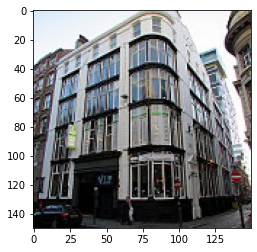

0


In [9]:
plt.imshow(train_X[0])
plt.show()
print(train_Y[0])

In [10]:
test_X, test_Y = get_data(test_path)

seg_test\seg_test\buildings
seg_test\seg_test\forest
seg_test\seg_test\glacier
seg_test\seg_test\mountain
seg_test\seg_test\sea
seg_test\seg_test\street


In [11]:
np.unique(train_Y, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([2191, 2271, 2404, 2512, 2274, 2382], dtype=int64))

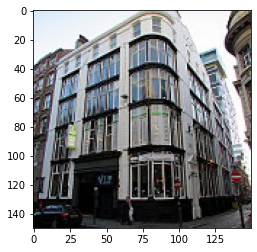

0


In [12]:
plt.imshow(train_X[0])
plt.show()
print(train_Y[0])

In [13]:
pred_data=[]
for img_path in os.listdir(pred_path):
    img=image.load_img(os.path.join(pred_path,img_path), target_size=(150,150))
    pred_data.append((image.img_to_array(img))/255)

pred_data=np.asarray(pred_data)

In [14]:
pred_data

array([[[[0.6862745 , 0.59607846, 0.47058824],
         [0.79607844, 0.7137255 , 0.5921569 ],
         [0.7921569 , 0.7019608 , 0.5686275 ],
         ...,
         [0.9490196 , 0.7019608 , 0.32156864],
         [0.8862745 , 0.60784316, 0.28627452],
         [0.9254902 , 0.63529414, 0.34901962]],

        [[0.77254903, 0.6745098 , 0.5529412 ],
         [0.84313726, 0.7529412 , 0.6313726 ],
         [0.81960785, 0.72156864, 0.6       ],
         ...,
         [0.92941177, 0.654902  , 0.27058825],
         [0.9529412 , 0.6431373 , 0.28235295],
         [0.92156863, 0.58431375, 0.24313726]],

        [[0.7647059 , 0.6666667 , 0.54509807],
         [0.7882353 , 0.69411767, 0.58431375],
         [0.8392157 , 0.7490196 , 0.627451  ],
         ...,
         [0.9372549 , 0.6509804 , 0.2509804 ],
         [0.9490196 , 0.62352943, 0.22352941],
         [0.9490196 , 0.6       , 0.2       ]],

        ...,

        [[1.        , 0.92941177, 0.7882353 ],
         [0.9607843 , 0.8862745 , 0.72156864]

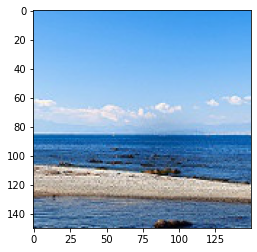

In [15]:
plt.imshow(pred_data[6])

In [16]:
train_X.shape , test_X.shape  , pred_data.shape

((14034, 150, 150, 3), (3000, 150, 150, 3), (7301, 150, 150, 3))

In [17]:
with open('train_X.pkl','wb') as f:
    pickle.dump(train_X, f)
    
with open('train_Y.pkl','wb') as f:
    pickle.dump(train_Y, f)
    
with open('test_X.pkl','wb') as f:
    pickle.dump(test_X, f)
    
with open('test_Y.pkl','wb') as f:
    pickle.dump(test_Y, f)
    
with open('pred_data.pkl','wb') as f:
    pickle.dump(pred_data, f)

In [18]:
# with open('train_X.pkl','rb') as f:
#     train_X = pickle.load(f)
#     print(train_X.shape)